# Forecast Station Notebook 

`Forecast` inherits from `station` in order to reuse some attributes but it is not necessarily a particular station type. Rather `Forecast` is a class which aims to provide the ability to forecast metrics using a simple autoregressive linear model. 

## Initialisation 

In [1]:
from flood_monitoring import Forecast, station 

In [2]:
forecast = Forecast() 

## Attributes 

After fitting our model a `model` attribute is appended to the `ForecastStation` object. 

# Methods 

### `load_data` 

`load_data` which takes in a measure_notation and a date range and provides all of the readings back as a Pandas DataFrame. `load_data` usings `get_readings` method inherited from the `station` class to perform the API call and then transforms the result into a DataFrame. 

In [13]:
measure = station.measure_dclass(
    notation = '1412-temperature-dry_bulb-i-1_h-deg_C',
    parameter = 'temperature', 
    qualifier = 'Dry Blub',
    units = 'deg C', 
    value_type = '') 

In [14]:
readings_df = forecast.load_data(measure.notation, date_range = ['2025-05-20', '2025-06-06']) 

Pritning the first 5 rows of the readings dataframe. 

In [15]:
readings_df.head() 

,dateTime,measure,value
0,2025-05-20T00:00:00Z,http://environment.data.gov.uk/flood-monitorin...,10.9
1,2025-05-20T01:00:00Z,http://environment.data.gov.uk/flood-monitorin...,10.3
2,2025-05-20T02:00:00Z,http://environment.data.gov.uk/flood-monitorin...,9.8
3,2025-05-20T03:00:00Z,http://environment.data.gov.uk/flood-monitorin...,9.4
4,2025-05-20T04:00:00Z,http://environment.data.gov.uk/flood-monitorin...,9.4


### `transfom_data` 

In [11]:
help(forecast.transform_data)

Help on function transform_data in module flood_monitoring.forecast:

transform_data(dataframe: pandas.core.frame.DataFrame, lag_features: int, evaluation_split: bool = False, split_date: str | None = None, split_size: int = 5) -> tuple
    Transforms the dataframe which stores the measure readings into training/testing arrays which are then
    used to fit our Linear Regression model to. 
    
    Inputs: 
    
        dataframe [pd.DataFrame] - DataFrame storing the readings retrieved from load_data
        lag_features [int]       - Defines the number of lag features which should be created 
        evaluation_split [bool]  - Boolean flag defining whether or not the arrays should be split into training and testing sets 
        split_date [str]         - Optional parameter if evaluation_split is True, split_date defines point where the train/test datasets are split
        split_size [int]         - if evaluation_split is True, split_size defines how many of the last n values should

In [6]:
X,y = forecast.transform_data(readings_df, lag_features = 3 ) 

In [16]:
X.shape 

(429, 3)

17 is the number of samples and 3 is number of previous values in each sample which we defined to be 3. 

Calling the function again with `evaluation_split` set to True and `split_size` set to 20 

In [17]:
x_train, y_train, x_test, y_test, test_timestamps  = forecast.transform_data(readings_df, lag_features = 3, evaluation_split = True, split_size = 5) 

Where `x_test` stores the last 3 values inside of the training data, as they will be used to forecast into the test set 

In [18]:
x_test

array([10.4, 10.7,  9.9])

`test_timestamps` stores the timestamps of the values within our test set

In [19]:
test_timestamps 

array(['2025-05-20T07:00:00Z', '2025-05-20T06:00:00Z',
       '2025-05-20T05:00:00Z', '2025-05-20T04:00:00Z',
       '2025-05-20T03:00:00Z'], dtype=object)

### `fit`

Calling `fit` instantiates and fits an scikit-learn `LinearRegression` Model to the X,y parameters passed to the method 

In [20]:
forecast.fit(x_train, y_train)

accessing the model attribute, set after `fit` 

In [21]:
forecast.model 

LinearRegression()

### `Predict`

`predict` function performs autoregressive inference, where the value predicted is then fed into the nex prediction. 

The number of predictions produced is defined by `n_predictions` and `x_test` is the previous k values prior to the ones we which to predict.

In [22]:
predictions = forecast.predict(x_test, n_predictions = 5 ) 

In [23]:
predictions

array([10.75677206, 10.94140867,  9.78077887, 11.23712326, 11.11402891])

### `visualise_predictions`

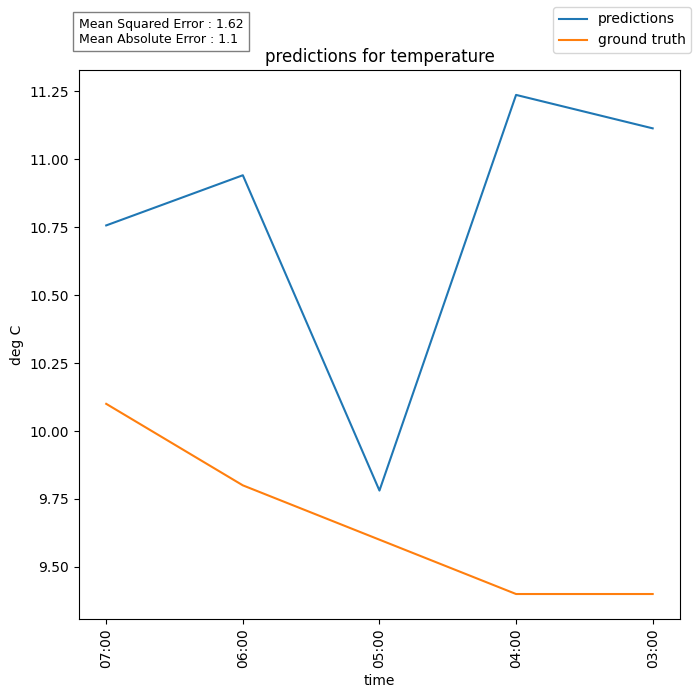

In [26]:
fig,ax  = forecast.visualise_predictions(predictions = predictions, 
                                measure = measure,
                                test_timestamps = test_timestamps, 
                                ground_truth = y_test ) 

### `evaluate_forecast`

method which strings all of the previous methods together to to perform a full evaluation and plot a figure. The function takes a given measure which we want to forecast, a date range for training/eval, either split_size or split date and finally lag features which define the number of previous values we will be using to forecast future values.

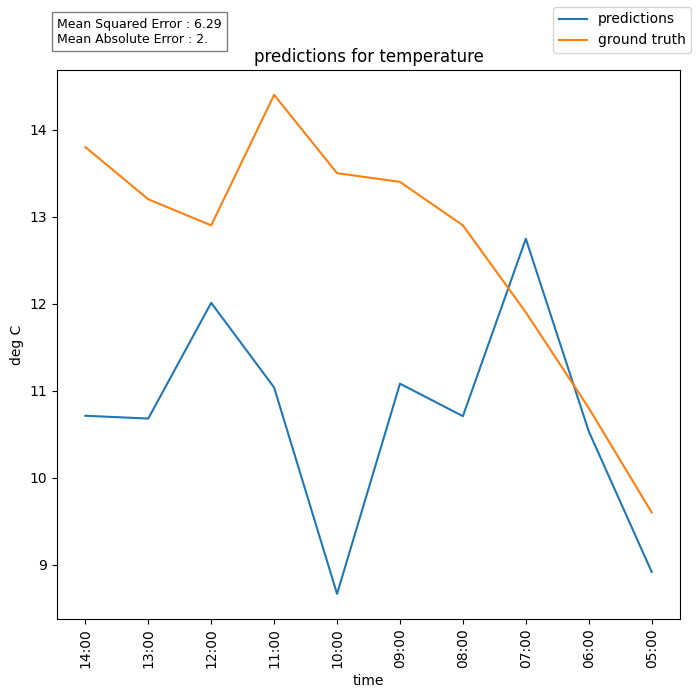

In [28]:
forecast.evaluate_forecast(measure, ['2025-06-01', '2025-06-07'], split_size = 10, lag_features = 5 ); 